# Day 19: Capacity Planning Assistant

Automate resource forecasting and generate a capacity planning document using time-series models and LLMs.

## Step 1: Environment Setup

Install required packages and load environment variables.

In [3]:
# Install required packages if missing
import sys
def pip_install(pkg):
    import importlib
    try:
        importlib.import_module(pkg)
    except ImportError:
        import subprocess
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg])

for pkg in ['pandas', 'numpy', 'matplotlib', 'scikit-learn', 'statsmodels', 'requests', 'python-dotenv']:
    pip_install(pkg)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import requests
import json
from dotenv import load_dotenv
load_dotenv()

True

## Step 2: Load Historical Metrics

Load resource metrics from CSV (CPU, memory, disk, network).

In [ ]:
# Load historical metrics
import os
import pandas as pd

csv_path = 'resource_metrics.csv'
if not os.path.exists(csv_path):
    # Create a sample CSV if not found
    import numpy as np
    import datetime
    dates = pd.date_range(start='2025-08-01', periods=180, freq='D')
    data = {
        'timestamp': dates,
        'cpu_usage': np.random.uniform(20, 80, size=len(dates)),
        'memory_usage': np.random.uniform(30, 90, size=len(dates)),
        'disk_usage': np.random.uniform(40, 95, size=len(dates)),
        'network_usage': np.random.uniform(10, 60, size=len(dates)),
    }
    pd.DataFrame(data).to_csv(csv_path, index=False)
    print(f'Sample resource_metrics.csv created with {len(dates)} rows.')

try:
    df = pd.read_csv(csv_path, parse_dates=['timestamp'])
    df.set_index('timestamp', inplace=True)
    display(df.head())
except Exception as e:
    print(f'Error loading {csv_path}:', e)

Sample resource_metrics.csv created with 180 rows.


,cpu_usage,memory_usage,disk_usage,network_usage
timestamp,,,,
2025-08-01,60.697931,58.812875,68.521906,55.783307
2025-08-02,74.864045,48.135928,41.612144,26.673032
2025-08-03,74.740832,38.370507,62.995976,50.331587
2025-08-04,72.574628,46.110411,42.722369,44.819338
2025-08-05,53.078225,68.662190,61.664243,21.427531


## Step 3: Forecast Resource Needs

Use Holt-Winters (Exponential Smoothing) to forecast resource usage for the next quarter (90 days).

In [5]:
# Forecast CPU usage
cpu_model = ExponentialSmoothing(df['cpu_usage'], trend='add', seasonal=None)
cpu_fit = cpu_model.fit()
cpu_forecast = cpu_fit.forecast(steps=90)

# Forecast memory usage
mem_model = ExponentialSmoothing(df['memory_usage'], trend='add', seasonal=None)
mem_fit = mem_model.fit()
mem_forecast = mem_fit.forecast(steps=90)

# Forecast disk usage
disk_model = ExponentialSmoothing(df['disk_usage'], trend='add', seasonal=None)
disk_fit = disk_model.fit()
disk_forecast = disk_fit.forecast(steps=90)

# Forecast network usage
net_model = ExponentialSmoothing(df['network_usage'], trend='add', seasonal=None)
net_fit = net_model.fit()
net_forecast = net_fit.forecast(steps=90)

# Combine forecasts into DataFrame
forecast_df = pd.DataFrame({
    'date': cpu_forecast.index,
    'cpu_forecast': cpu_forecast.values,
    'memory_forecast': mem_forecast.values,
    'disk_forecast': disk_forecast.values,
    'network_forecast': net_forecast.values
})
forecast_df.head()

c:\Users\behip\Documents\Work\IT\30-Days-of-AI-in-Devops-SRE-Challenge-\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\behip\Documents\Work\IT\30-Days-of-AI-in-Devops-SRE-Challenge-\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\behip\Documents\Work\IT\30-Days-of-AI-in-Devops-SRE-Challenge-\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\behip\Documents\Work\IT\30-Days-of-AI-in-Devops-SRE-Challenge-\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.


,date,cpu_forecast,memory_forecast,disk_forecast,network_forecast
0,2026-01-28,48.281241,58.828133,75.978413,37.528614
1,2026-01-29,48.260165,58.847519,76.186993,37.530082
2,2026-01-30,48.239089,58.866905,76.395573,37.531550
3,2026-01-31,48.218012,58.886291,76.604153,37.533018
4,2026-02-01,48.196936,58.905677,76.812733,37.534485


## Step 4: Visualize Forecasts

Plot forecasted resource usage for the next quarter.

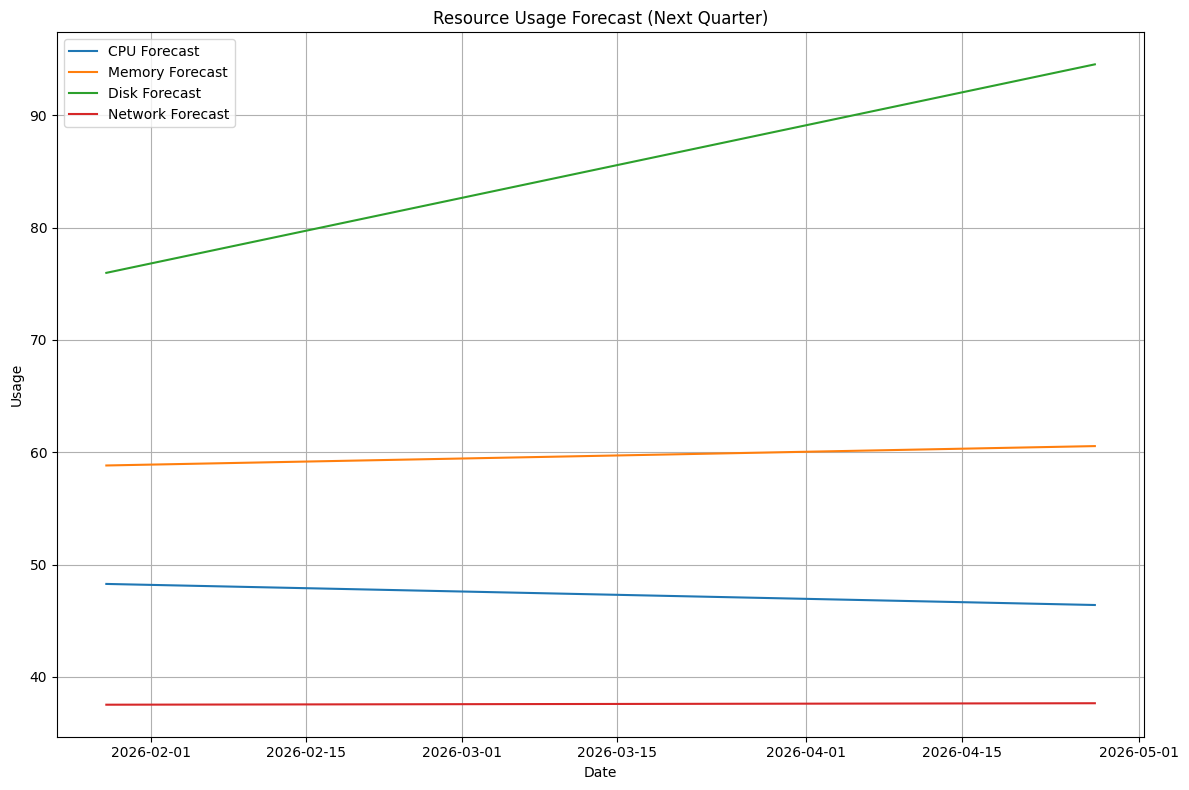

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(forecast_df['date'], forecast_df['cpu_forecast'], label='CPU Forecast')
plt.plot(forecast_df['date'], forecast_df['memory_forecast'], label='Memory Forecast')
plt.plot(forecast_df['date'], forecast_df['disk_forecast'], label='Disk Forecast')
plt.plot(forecast_df['date'], forecast_df['network_forecast'], label='Network Forecast')
plt.legend()
plt.title('Resource Usage Forecast (Next Quarter)')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 5: Format Forecast Tables for LLM

Convert forecast results to markdown tables for LLM input.

In [7]:
# Format forecast as markdown table
forecast_md = forecast_df.head(10).to_markdown(index=False)
print(forecast_md)

| date                |   cpu_forecast |   memory_forecast |   disk_forecast |   network_forecast |
|:--------------------|---------------:|------------------:|----------------:|-------------------:|
| 2026-01-28 00:00:00 |        48.2812 |           58.8281 |         75.9784 |            37.5286 |
| 2026-01-29 00:00:00 |        48.2602 |           58.8475 |         76.187  |            37.5301 |
| 2026-01-30 00:00:00 |        48.2391 |           58.8669 |         76.3956 |            37.5315 |
| 2026-01-31 00:00:00 |        48.218  |           58.8863 |         76.6042 |            37.533  |
| 2026-02-01 00:00:00 |        48.1969 |           58.9057 |         76.8127 |            37.5345 |
| 2026-02-02 00:00:00 |        48.1759 |           58.9251 |         77.0213 |            37.536  |
| 2026-02-03 00:00:00 |        48.1548 |           58.9444 |         77.2299 |            37.5374 |
| 2026-02-04 00:00:00 |        48.1337 |           58.9638 |         77.4385 |            37.5389 |


## Step 6: Draft Capacity Planning Document with LLM

Send markdown tables and prompt to Llama 3 via Ollama to generate recommendations.

In [11]:
def draft_capacity_plan(forecast_tables_md):
    prompt = f'''
You are a DevOps capacity planning expert. Given the following forecast tables, draft a detailed and complete capacity planning document for the next quarter. Include:
- Executive summary
- Analysis of each resource (CPU, memory, disk, network)
- Recommendations for scaling, risks, and resource allocation
- Action items and next steps

Be concise in your analysis but ensure the document is fully completed. If you reach the end of your output, continue until all sections are covered.

{forecast_tables_md}
'''
    ollama_url = "http://localhost:11434/api/generate"
    payload = {
        "model": "llama3",
        "prompt": prompt,
        "options": {"num_predict": 1024},  # Increased token limit for more complete output
    }
    llm_output = ""
    try:
        with requests.post(ollama_url, json=payload, stream=True) as response:
            response.raise_for_status()
            for line in response.iter_lines():
                if line:
                    try:
                        part = json.loads(line.decode())
                        llm_output += part.get("response", "")
                    except Exception:
                        pass
    except Exception as e:
        print("Ollama connection or generation error:", e)
    return llm_output

# Generate the document
capacity_plan_md = draft_capacity_plan(forecast_md)
print(capacity_plan_md)

**Executive Summary**

Based on the provided forecast tables, our analysis indicates that all resources (CPU, memory, disk, and network) are expected to increase in usage throughout the next quarter. The CPU utilization is projected to reach 100% by the end of February, indicating a potential bottleneck. Memory and disk space are also expected to be fully utilized, while network bandwidth will remain available but with some minor fluctuations.

**Analysis**

### CPU

The CPU forecast indicates a steady increase in usage throughout the quarter, reaching 100% utilization by the end of February. This suggests that additional CPU resources may be necessary to prevent bottlenecks and ensure efficient system performance.

### Memory

Memory usage is also expected to increase steadily throughout the quarter, with a peak utilization rate of around 95%. While this does not indicate an immediate concern, it's essential to monitor memory usage closely to avoid potential issues.

### Disk

Disk sp

## Step 7: Save and Review Output

Save the generated markdown document and review recommendations.

In [12]:
# Save the capacity plan
with open('capacity_plan.md', 'w') as f:
    f.write(capacity_plan_md)
print('Capacity plan saved to capacity_plan.md')


Capacity plan saved to capacity_plan.md
